In [16]:
pip install opencv-python

Note: you may need to restart the kernel to use updated packages.


In [22]:
import numpy as np
import pandas as pd
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img
from tensorflow.keras import utils  # to_categorical
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import matplotlib.image 
import random
import os
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
import cv2
%matplotlib inline

In [3]:
FAST_RUN = True
IMAGE_WIDTH=128
IMAGE_HEIGHT=128
IMAGE_SIZE=(IMAGE_WIDTH, IMAGE_HEIGHT)
IMAGE_CHANNELS=3

In [4]:
filenames = os.listdir(r'C:\Users\Tanvi Shinde\Downloads\Cat_Dog_Classifiyer\train')
categories = []
for filename in filenames:
    category = filename.split('.')[0]
    print(category)
    if category == 'dog':
        categories.append(1)
    else:
        categories.append(0)

df = pd.DataFrame({
    'filename': filenames,
    'category': categories
})

cat
cat
cat
cat
cat
cat
cat
cat
cat
cat
cat
cat
cat
cat
cat
cat
cat
cat
cat
cat
cat
cat
cat
cat
cat
cat
cat
cat
cat
cat
cat
cat
cat
cat
cat
cat
cat
cat
cat
cat
cat
cat
cat
cat
cat
cat
cat
cat
cat
cat
cat
cat
cat
cat
cat
cat
cat
cat
cat
cat
cat
cat
cat
cat
cat
cat
cat
cat
cat
cat
cat
cat
cat
cat
cat
cat
cat
cat
cat
cat
cat
cat
cat
cat
cat
cat
cat
cat
cat
cat
cat
cat
cat
cat
cat
cat
cat
cat
cat
cat
cat
cat
cat
cat
cat
cat
cat
cat
cat
cat
cat
cat
cat
cat
cat
cat
cat
cat
cat
cat
cat
cat
cat
cat
cat
cat
cat
cat
cat
cat
cat
cat
cat
cat
cat
cat
cat
cat
cat
cat
cat
cat
cat
cat
cat
cat
cat
cat
cat
cat
cat
cat
cat
cat
cat
cat
cat
cat
cat
cat
cat
cat
dog
dog
dog
dog
dog
dog
dog
dog
dog
dog
dog
dog
dog
dog
dog
dog
dog
dog
dog
dog
dog
dog
dog
dog
dog
dog
dog
dog
dog
dog
dog
dog
dog
dog
dog
dog
dog
dog
dog
dog
dog
dog
dog
dog
dog
dog
dog
dog
dog
dog
dog
dog
dog
dog
dog
dog
dog
dog
dog
dog
dog
dog
dog
dog
dog
dog
dog
dog
dog
dog
dog
dog
dog
dog
dog
dog
dog
dog
dog
dog
dog
dog
dog
dog
dog
dog
dog
dog


In [5]:
df.head()

,filename,category
0,cat.0.jpg,0
1,cat.1.jpg,0
2,cat.10.jpg,0
3,cat.100.jpg,0
4,cat.101.jpg,0


<Axes: >

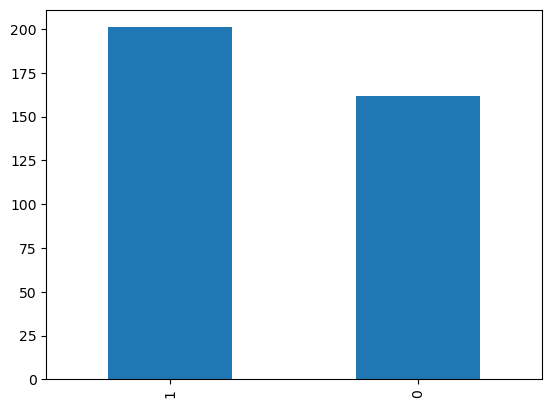

In [6]:
df['category'].value_counts().plot.bar()

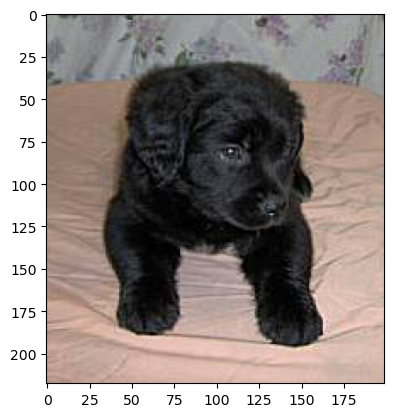

In [7]:
sample= random.choice(filenames)

image = load_img(r'C:\Users\Tanvi Shinde\Downloads\Cat_Dog_Classifiyer\train\\'+ sample)
plt.imshow(image)

In [8]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense, Activation, BatchNormalization

model = Sequential()

model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(IMAGE_WIDTH, IMAGE_HEIGHT, IMAGE_CHANNELS)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(2, activation='softmax')) # 2 because we have cat and dog classes

model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

model.summary()

C:\Users\Tanvi Shinde\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 126, 126, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 126, 126, 32)        │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 63, 63, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 63, 63, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 61, 61, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 61, 61, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 30, 30, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 30, 30, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 28, 28, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 28, 28, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 14, 14, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 14, 14, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 25088)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 512)                 │      12,845,568 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 512)                 │           2,048 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 2)                   │           1,026 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 12,942,786 (49.37 MB)

 Trainable params: 12,941,314 (49.37 MB)

 Non-trainable params: 1,472 (5.75 KB)

In [9]:
#callbacks
#early stop

earlystop = EarlyStopping(monitor='val_accuracy', patience=10)

learning_rate_reduction = ReduceLROnPlateau(monitor='val_accuracy',
                                            patience=2,
                                            verbose=1,
                                            factor=0.5,
                                            min_lr=0.00001)

callbacks = [earlystop, learning_rate_reduction]

In [10]:
df.head()

,filename,category
0,cat.0.jpg,0
1,cat.1.jpg,0
2,cat.10.jpg,0
3,cat.100.jpg,0
4,cat.101.jpg,0


In [11]:
df['category'] = df['category'].replace({0: 'cat', 1: 'dog'})

In [12]:
train_df,validate_df = train_test_split(df,test_size=0.20, random_state = 42)

train_df

,filename,category
209,dog.140.jpg,dog
338,dog.77.jpg,dog
357,dog.94.jpg,dog
75,cat.167.jpg,cat
84,cat.175.jpg,cat
...,...,...
71,cat.163.jpg,cat
106,cat.197.jpg,cat
270,dog.196.jpg,dog
348,dog.86.jpg,dog


In [13]:

train_df = train_df.reset_index(drop=True)
validate_df = validate_df.reset_index(drop=True)

In [14]:
train_df

,filename,category
0,dog.140.jpg,dog
1,dog.77.jpg,dog
2,dog.94.jpg,dog
3,cat.167.jpg,cat
4,cat.175.jpg,cat
...,...,...
285,cat.163.jpg,cat
286,cat.197.jpg,cat
287,dog.196.jpg,dog
288,dog.86.jpg,dog


In [15]:
train_df.shape

(290, 2)

In [16]:
validate_df.shape

(73, 2)

<Axes: >

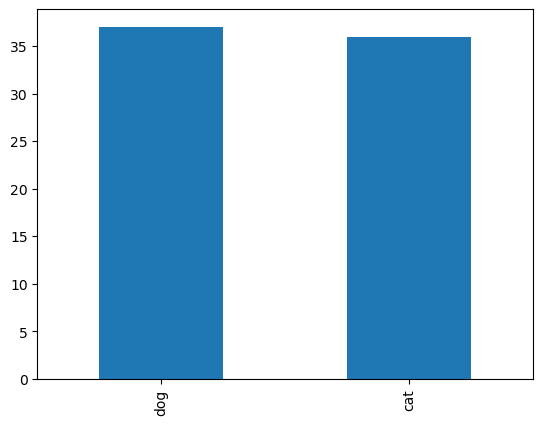

In [17]:
validate_df['category'].value_counts().plot.bar()

In [18]:
total_train = train_df.shape[0]
total_validate = validate_df.shape[0]
batch_size=15

In [19]:
#training generator

train_datagen = ImageDataGenerator(
    rotation_range=15,
    rescale=1./255,
    shear_range=0.1,
    zoom_range=0.2,
    horizontal_flip=True,
    width_shift_range=0.1,
    height_shift_range=0.1
)

train_generator = train_datagen.flow_from_dataframe(
    train_df,
    "C:\\Users\\Tanvi Shinde\\Downloads\\Cat_Dog_Classifiyer\\train\\",
    x_col='filename',
    y_col='category',
    target_size=IMAGE_SIZE,
    class_mode='categorical',
    batch_size=batch_size
)

Found 290 validated image filenames belonging to 2 classes.


In [20]:
validation_datagen = ImageDataGenerator(rescale=1./255)

validation_generator = validation_datagen.flow_from_dataframe(
    validate_df,
    "C:\\Users\\Tanvi Shinde\\Downloads\\Cat_Dog_Classifiyer\\train\\",
    x_col='filename',
    y_col='category',
    target_size=IMAGE_SIZE,
    class_mode='categorical',
    batch_size=batch_size
)

Found 73 validated image filenames belonging to 2 classes.


In [21]:
example_df = train_df.sample(n=1).reset_index(drop=True)
example_generator = train_datagen.flow_from_dataframe(
    example_df,
    "C:\\Users\\Tanvi Shinde\\Downloads\\Cat_Dog_Classifiyer\\train\\",
    x_col='filename',
    y_col='category',
    target_size=IMAGE_SIZE,
    class_mode='categorical'
)

Found 1 validated image filenames belonging to 1 classes.


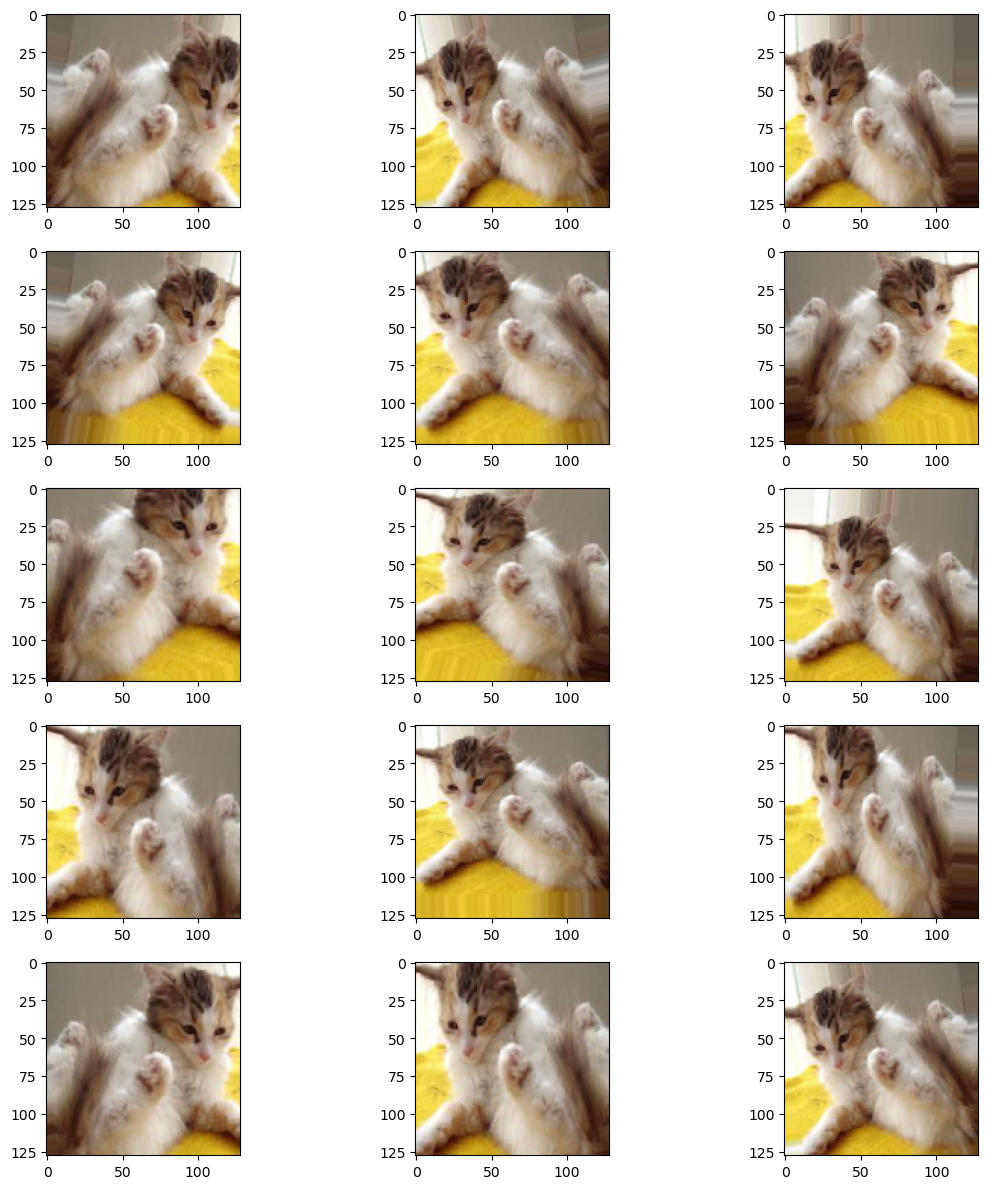

In [23]:
plt.figure(figsize=(12, 12))
for i in range(0, 15):
    plt.subplot(5, 3, i+1)
    for X_batch, Y_batch in example_generator:
        image = X_batch[0]
        plt.imshow(image)
        break
plt.tight_layout()
plt.show()

In [27]:
 #fit model
    
epochs =  3 if FAST_RUN else 50

history = model.fit(train_generator,
                             epochs = epochs,
                             validation_data = validation_generator,
                             validation_steps = total_validate//batch_size,
                             steps_per_epoch = total_train//batch_size,
                             callbacks = callbacks)

model.save("model.h5")

Epoch 1/3


C:\Users\Tanvi Shinde\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:120: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


19/19 ━━━━━━━━━━━━━━━━━━━━ 18s 678ms/step - accuracy: 0.5404 - loss: 1.9806 - val_accuracy: 0.4833 - val_loss: 1.0826 - learning_rate: 0.0010
Epoch 2/3
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.6000 - loss: 0.4496 - val_accuracy: 0.4615 - val_loss: 0.3661 - learning_rate: 0.0010
Epoch 3/3


C:\Users\Tanvi Shinde\anaconda3\Lib\contextlib.py:155: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


19/19 ━━━━━━━━━━━━━━━━━━━━ 10s 465ms/step - accuracy: 0.5464 - loss: 1.1853 - val_accuracy: 0.5167 - val_loss: 0.8302 - learning_rate: 0.0010


<function matplotlib.pyplot.show(close=None, block=None)>

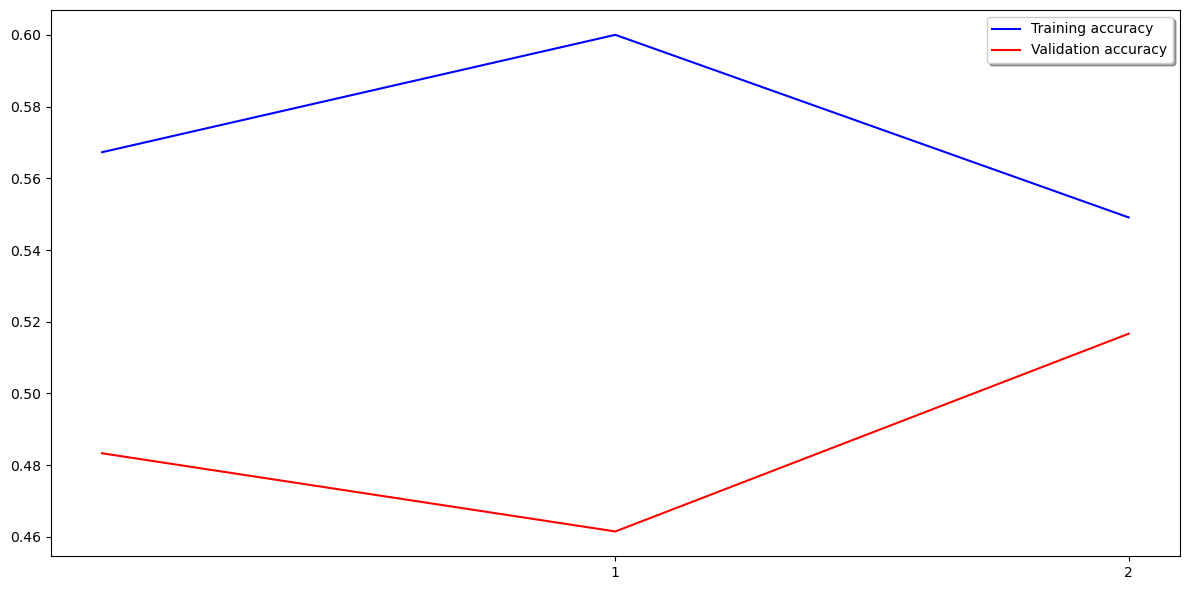

In [31]:
fig, (ax1) = plt.subplots(1, 1, figsize=(12,6))

ax1.plot(history.history['accuracy'], color='b', label="Training accuracy")
ax1.plot(history.history['val_accuracy'], color='r', label="Validation accuracy")
ax1.set_xticks(np.arange(1, epochs, 1))

legend = plt.legend(loc='best', shadow=True)
plt.tight_layout()
plt.show